## Charcter Recognition with SVMs

In [79]:
from sklearn.metrics import accuracy_score 
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
import numpy.random as r 
import matplotlib.pyplot as plt 
import cv2

import glob
import matplotlib.gridspec as gridspec #A grid layout to place subplots within a figure.
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

%matplotlib inline 
from sklearn.model_selection import train_test_split 
from sklearn import metrics,svm
from sklearn.metrics import confusion_matrix
import seaborn as sn #for visualization

### Reading in one license plate 

In [80]:
license_plate = glob.glob("test_lps/3P8757M/*.jpg")
print(license_plate)

['test_lps/3P8757M/M.jpg', 'test_lps/3P8757M/8.jpg', 'test_lps/3P8757M/7_1.jpg', 'test_lps/3P8757M/5.jpg', 'test_lps/3P8757M/7.jpg', 'test_lps/3P8757M/3.jpg', 'test_lps/3P8757M/P.jpg']


In [81]:
fig = plt.figure(figsize=(8,8))
plt.rcParams.update({"font.size":14})
print(len(license_plate))

7


<Figure size 576x576 with 0 Axes>

M
8
7
5
7
3
P


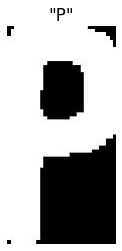

In [103]:
for i in range(len(license_plate)):
    image = load_img(license_plate[i])
    #image = cv2.imread(license_plate[i])
    label = license_plate[i].split("/")[2][0]
    print(label)
    plt.title('"{:s}"'.format(label))
    plt.axis(False)
    plt.imshow(image)

test_lps/3P8757M/M.jpg
test_lps/3P8757M/8.jpg
test_lps/3P8757M/7_1.jpg
test_lps/3P8757M/5.jpg
test_lps/3P8757M/7.jpg
test_lps/3P8757M/3.jpg
test_lps/3P8757M/P.jpg
(28, 28)
784


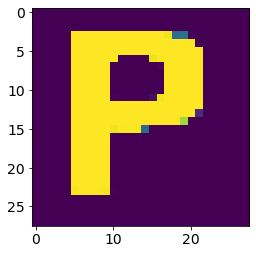

In [104]:
X=[]
labels =[]

for image_path in license_plate:
    print(image_path)
    image = cv2.imread(image_path, 0) #0 = grayscale
    
    PADDING = [0,0,0]
    PAD = 30
    image= cv2.copyMakeBorder(image,PAD,PAD+10,PAD,PAD+10,cv2.BORDER_CONSTANT,value=PADDING)         
    image = cv2.resize(image, (28, 28))
    plt.imshow(image)
    #print(image)
    X.append(image)
    label = image_path.split("/")[2][0]
    labels.append(label)

    
print(image.shape)
print(image.size)
 
X_test = np.array(X, dtype = "float")

In [105]:
y_test = np.array(labels)
print(y_test.shape)

(7,)


### Reading our character and digit dataset

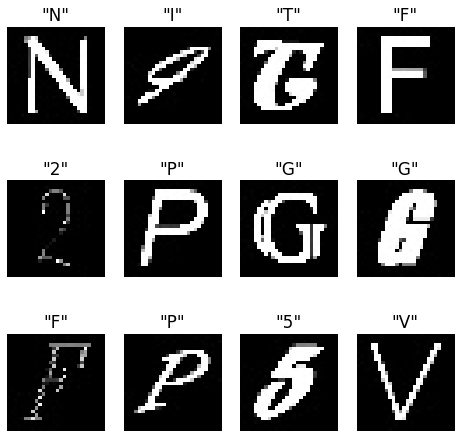

In [106]:
characters = glob.glob("dataset_characters/**/*.jpg")
cols=4
rows=3
fig = plt.figure(figsize=(8,8))
plt.rcParams.update({"font.size":14})
grid = gridspec.GridSpec(ncols=cols,nrows=rows,figure=fig)

# create a random list of images will be displayed
np.random.seed(45)
rand = np.random.randint(0,len(characters),size=(cols*rows))

# Plot example images
for i in range(cols*rows):
    fig.add_subplot(grid[i])
    image = load_img(characters[rand[i]])
    label = characters[rand[i]].split(os.path.sep)[-2]
    plt.title('"{:s}"'.format(label))
    plt.axis(False)
    plt.imshow(image)

In [107]:
X=[]
labels_train =[]

for image_path in characters:
    image = cv2.imread(image_path, 0) #0 = grayscale
    image = cv2.resize(image, (28, 28)) 
    X.append(image)
    label = image_path.split(os.path.sep)[-2]
    labels_train.append(label)

    
print(image.shape)
print(image.size)
 
X = np.array(X, dtype = "float")
print(X[10000])
print(X.shape)

(28, 28)
784
[[  2.   0.   0.   1.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   3.   0.   0.   2.   1.   0.   2.   0.   0.   0.   0.]
 [  0.   5.   0.   0.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   3.   0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   3.   0.   0.   1.   1.   0.   0.   0.   0.   0.   0.
    0.   0.   1.   0.   2.   3.   0.   1.   4.   0.   0.   0.   0.   0.]
 [  2.   0.   0.   0.   0.   5.   0. 254. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 252. 252. 255. 253.   0.   0.   0.   0.   0.   0.]
 [  1.   1.   1.   1.   2.   0.   0. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 254. 255. 255. 255. 253. 255.   2.   3.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   4. 254. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 252. 253. 255.   0.   0.   0.   0.   0.   0.]
 [  1.   2.   2.   0.   0.   2.   0.   1.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   1. 255. 255. 255.  41.   0

In [108]:
y = np.array(labels_train)
print(y.shape)

(37623,)


## SVMs

In [206]:
X_train, x_, y_train, y_ = train_test_split(X, y, test_size = 0.96, random_state = 42)

In [207]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1504, 28, 28)
(7, 784)
(1504,)
(7,)


In [208]:
num_pixels = 784 #28*28
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(1504, 784)
(7, 784)


In [209]:
#linear kernel

param_C = 100
param_gamma = 0.0001
model = svm.SVC(kernel = 'linear', C=param_C,gamma=param_gamma) #'poly', 'rbf'

In [210]:
model.fit(X_train, y_train)

SVC(C=100, gamma=0.0001, kernel='linear')

In [211]:
expected = y_test 
predicted = model.predict(X_test)

In [212]:
model.score(X_test, y_test)#how good the model is 

1.0

Text(65.0, 0.5, 'Truth')

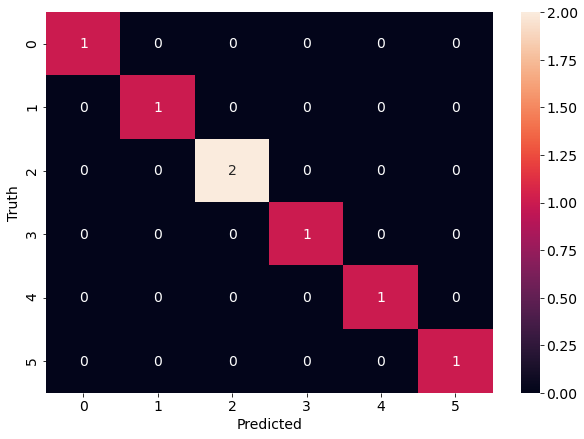

In [213]:
cm = metrics.confusion_matrix(expected, predicted)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [214]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1
           M       1.00      1.00      1.00         1
           P       1.00      1.00      1.00         1

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [215]:
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []


In [216]:
from sklearn import svm

# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_linear(c):
    # TODO - Create an object of svm.SVC(probability = False, kernel = 'linear', C = c) - 5 points
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    
    # TODO - Fit the classifier on the training set - 5 points
    svc_linear.fit(X_train, y_train)
    # TODO - Find the prediction and accuracy on the training set - 5 points
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = svc_linear.score(X_train, y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # TODO - Find the prediction and accuracy on the test set - 5 points
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = svc_linear.score(X_test, y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_linear.append(c)

In [217]:
for c in cVals:
    svm_linear(c)

Train Accuracy = 0.992686
Test Accuracy = 1.000000
Train Accuracy = 1.000000
Test Accuracy = 1.000000
Train Accuracy = 1.000000
Test Accuracy = 1.000000
Train Accuracy = 1.000000
Test Accuracy = 1.000000
Train Accuracy = 1.000000
Test Accuracy = 1.000000


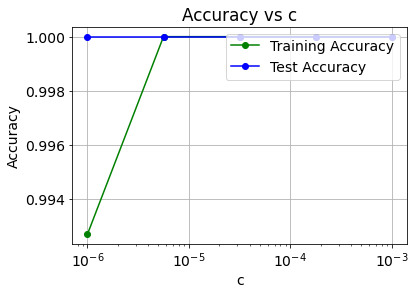

In [218]:
plt.plot(cVals, acc_train_svm_linear, color="green", marker="o")
plt.plot(cVals, acc_test_svm_linear, color="blue", marker="o")
plt.xscale("log")
plt.grid()
plt.xlabel("c")
plt.ylabel("Accuracy")
plt.title("Accuracy vs c")

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')